In [312]:
from IPython.display import HTML
HTML('''
<script
    src="https://cdnjs.cloudflare.com/ajax/libs/jquery/2.0.3/jquery.min.js ">
</script>
<script>
code_show=true;
function code_toggle() {
 if (code_show){
 $('div.jp-CodeCell > div.jp-Cell-inputWrapper').hide();
 } else {
$('div.jp-CodeCell > div.jp-Cell-inputWrapper').show();
 }
 code_show = !code_show
}
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit"
    value="Click here to toggle on/off the raw code."></form>
''')

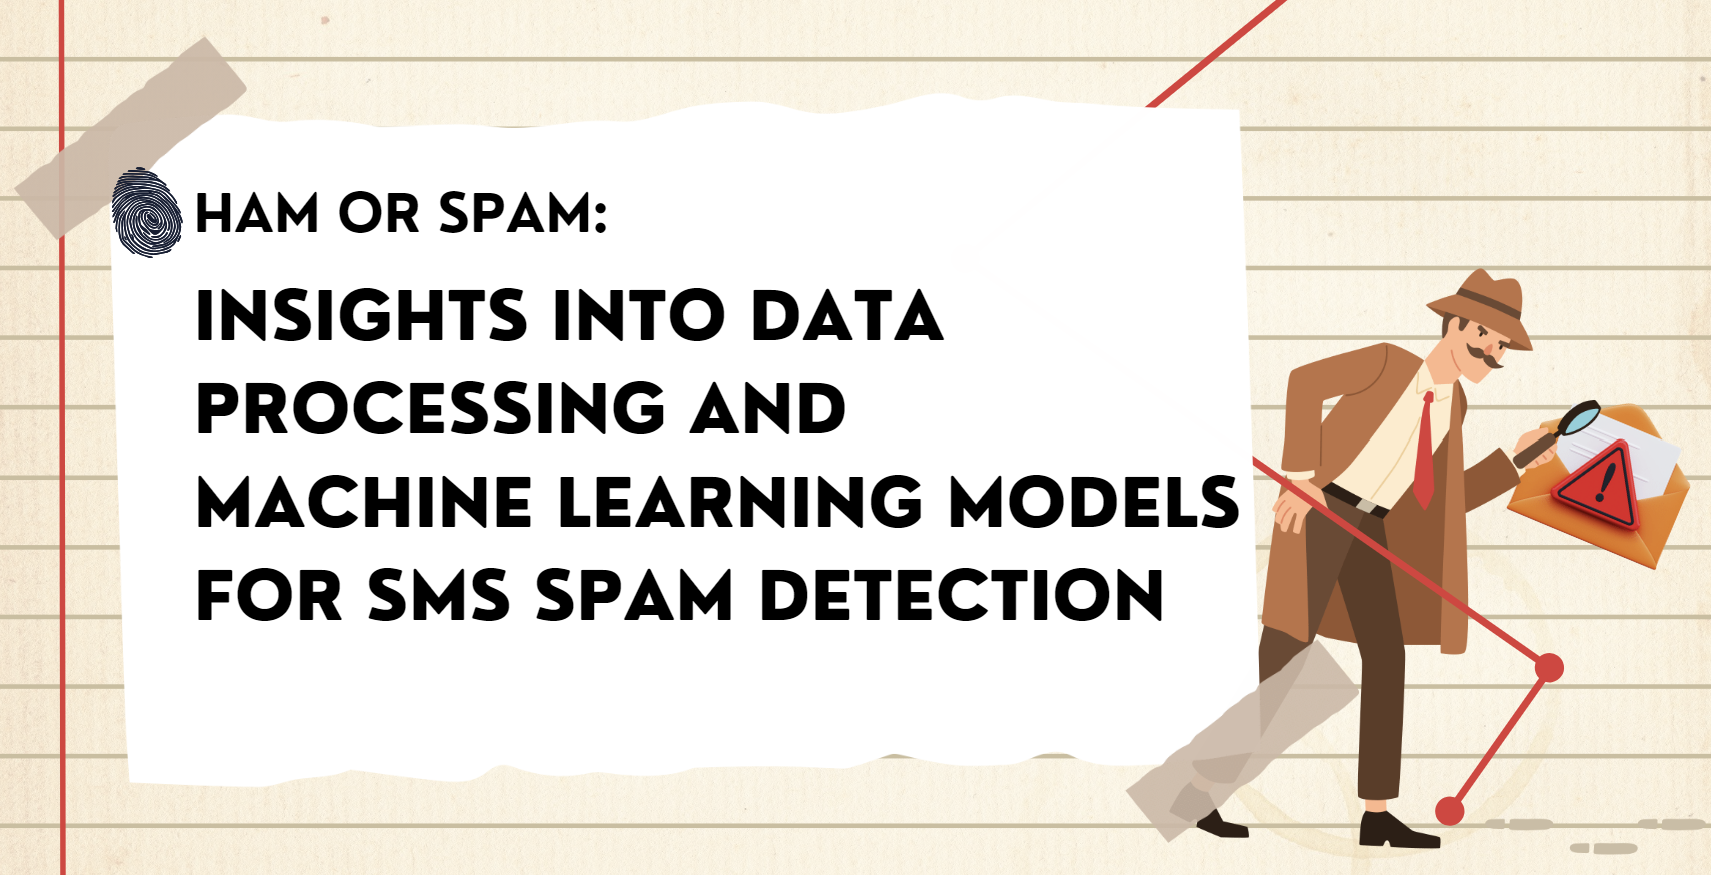

In [311]:
from IPython.display import Image
Image(filename='proj_banner.png')

<a id='Header2'></a>
<h1 style="color:#ffffff; background-color:#845333; padding: 20px 0; text-align: left; font-weight: bold; padding-left: 20px;">PROBLEM DESCRIPTION</h1><a id='ExecSum'></a><a id='Title'></a>

Even before the advancement of technologies such as Machine Learning, there was already widespread use of SMS to deceive people into scams and fraudulent schemes. As mobile communication remains an integral part of daily life, the proliferation of spam messages not only becomes a nuisance but also poses significant security risks, which may lead to potential financial losses and privacy breaches for unsuspecting victims.

Our country is not exempted from this kind of risk. For instance, in 2010, there was a text scam targeting relatives of overseas Filipino workers. These scammers would pretend to be their relatives working abroad and would be asking for a load due to an alleged emergency. Many were victims of this modus operandi including my grandmother. This incident also inspired me to work on this project.

In the years that followed, the problem only intensified. this problem is still rampant with different social engineering techniques and incorporating links that an individual can access. According to Statista, there were approximately 15.9 million spam SMS sent here in our country in 2019 (as seen in the graph below). This figure could be higher now as of this time. Furthermore, it also evolve as spam messages are also present in email, social media apps, and other mobile apps.

As a Data Science student with exposure to the Machine Learning 1 course, we ask the question: Can the methods we have learned in class already combat this kind of issue? Through this project, we seek to address this persistent and evolving threat by leveraging Machine Learning models and Data Mining and Wrangling techniques that can be very useful for this use case.

In [625]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, display_html
%matplotlib inline

import warnings
from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning

warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)
warnings.filterwarnings("ignore", category=ConvergenceWarning)

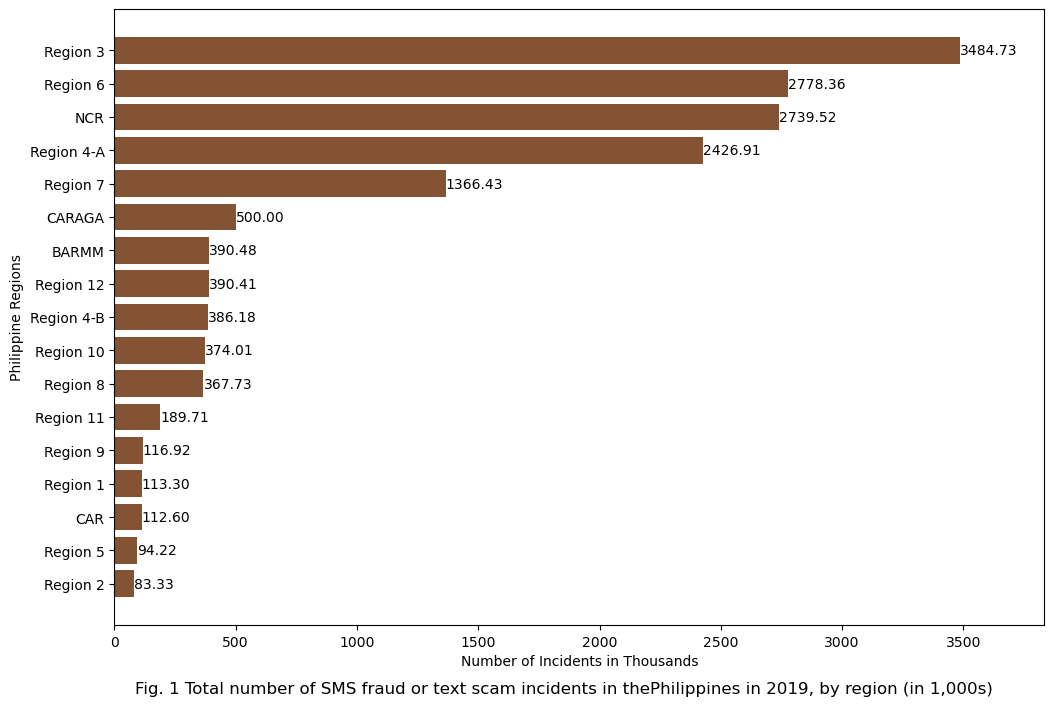

In [419]:
# Data from Statista
# https://www.statista.com/statistics/1136130/philippines-number-of-sms-fraud-or-text-scams-incidents-by-region/

ph_region = ['Region 3', 'Region 6', 'NCR', 'Region 4-A', 'Region 7', 'CARAGA',
             'BARMM', 'Region 12', 'Region 4-B', 'Region 10', 'Region 8',
             'Region 11', 'Region 9', 'Region 1', 'CAR', 'Region 5',
             'Region 2']

ph_region_spam = [3484.73, 2778.36, 2739.52, 2426.91, 1366.43, 500.0, 390.48,
                  390.41, 386.18, 374.01, 367.73, 189.71, 116.92, 113.3, 112.6,
                  94.22, 83.33]

# Creating the bar chart
plt.figure(figsize=(12, 8))
bars = plt.barh(ph_region, ph_region_spam, color='#845333')
plt.xlim(0, max(ph_region_spam) * 1.1)

# Adding the value labels on each bar
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, 
             f'{bar.get_width():.2f}', 
             va='center', ha='left')
    
plt.xlabel('Number of Incidents in Thousands')
plt.ylabel('Philippine Regions')
plt.suptitle(
    'Fig. 1 Total number of SMS fraud or text scam incidents in the'
    'Philippines in 2019, by region (in 1,000s)', y=0.04, fontsize=12)
plt.gca().invert_yaxis()
plt.show()


<a id='Header1'></a>
<h1 style="color:#ffffff; background-color:#845333; padding: 20px 0; text-align: left; font-weight: bold; padding-left: 20px;">HIGHLIGHTS</h1><a id='ExecSum'></a><a id='Title'></a>

- The Multinomial Naive-Bayes model demonstrated its advantage on highly sparse data as compared to our ML1 models.
- SMS Spam text classification was the chosen use case with results showing better accuracy and speed.
- We used and compared two options to vectorize our text data: Count Vectorizer and TFIDF Vectorizer.
- We introduced the Natural Language Toolkit (NLTK) library for symbolic and statistical natural language processing (NLP).
- Our model achieved a test accuracy of ~98% and an F1 score of ~93%.


<a id='Header1'></a>
<h1 style="color:#ffffff; background-color:#845333; padding: 20px 0; text-align: left; font-weight: bold; padding-left: 20px;">METHOD AND RESULTS</h1><a id='ExecSum'></a><a id='Title'></a>

This study follows the Machine Learning Pipeline below to address our problem and extract relevant insights for learning. 

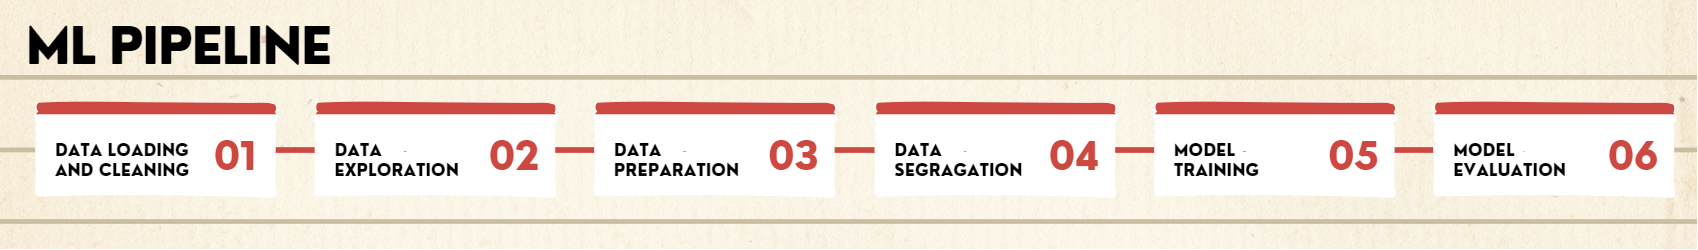

In [323]:
from IPython.display import Image
Image(filename='ML_Pipeline.png')

<h2 style="color:#ffffff; background-color:#a67c52; padding: 10px 0; text-align: left; font-weight: bold; padding-left: 20px;">Data Loading and Cleaning</h2>

Our *SMS Spam Collection Dataset* came from [Kaggle](https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset/data) released by *UCI MACHINE LEARNING*. This dataset contains 5,574 English messages from Singapore. Messages are labeled as ‘ham’ for legitimate SMS while ‘spam’ for actual spam.


In [426]:
data = pd.read_csv('spam.csv', encoding='latin-1')
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


Now that the data is loaded, we can now validate and clean the data. Columns that contains NaN values were deleted and renamed the column for easier identification.

In [427]:
data = data.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1)
data = data.rename(columns={"v1":"label", "v2":"sms"})
data.head()

,label,sms
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


Let us check check the current size of our dataset and if there are any duplicate values to be deleted.

In [428]:
data.label.value_counts()

label
ham     4825
spam     747
Name: count, dtype: int64

In [429]:
# Removal of Duplicate Values
data = data.drop_duplicates(keep='first')

In [430]:
# Check for missing values
data.isnull().sum()

label    0
sms      0
dtype: int64

In [431]:
# Check for duplicate values
data.duplicated().sum()

0

In [432]:
# Recheck for duplicate values
data.duplicated().sum()

0

After removing the duplicate values, our dataset now only contains unique values. Let us also update the label using *LabelEncoder*.

In [433]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
data['label'] = encoder.fit_transform(data['label'])
data.head()

,label,sms
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


<h2 style="color:#ffffff; background-color:#a67c52; padding: 10px 0; text-align: left; font-weight: bold; padding-left: 20px;">Data Exploration</h2>

At this point, our dataset now contains the `sms` and `label` columns. As part of the ML pipeline, we need to explore the data and identify possible insights that will help in our analysis. But, how do we perform data exploration for text data with just one feature? For this scenario, we can analyze the stylometric of the SMS messages from the dataset. This includes extracting the length of the SMS, the number of words, and the number of sentences. To help us with this step, we can use the *Natural Language Toolkit* or `nltk` library from Python. It is a suite of libraries and programs for symbolic and statistical natural language processing (NLP). We also need to download `punkt` which is a pre-trained model that helps to tokenize (split) text into sentences.

In [434]:
import nltk

In [245]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /home/msds2024/jorenday/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [435]:
data['num_length'] = data['sms'].apply(len)
data['num_words'] = data['sms'].apply(lambda x:len(nltk.word_tokenize(x)))
data['num_sentences'] = data['sms'].apply(lambda x:len(nltk.sent_tokenize(x)))

data.head()

,label,sms,num_length,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


After extracting these information, we can now generate a pair plot based on the stylometrics.

### Dataset Pairplot and Statistical Figures

From the pair plot, we can see where our SMS classes are distributed. Unfortunately, there is no clear separation on whether an SMS is spam or not based on these stylometric features. Datasets from each class are clumped together on the generated characteristics. Meanwhile, below are the statistical figures of our dataset based on the stylometric features.

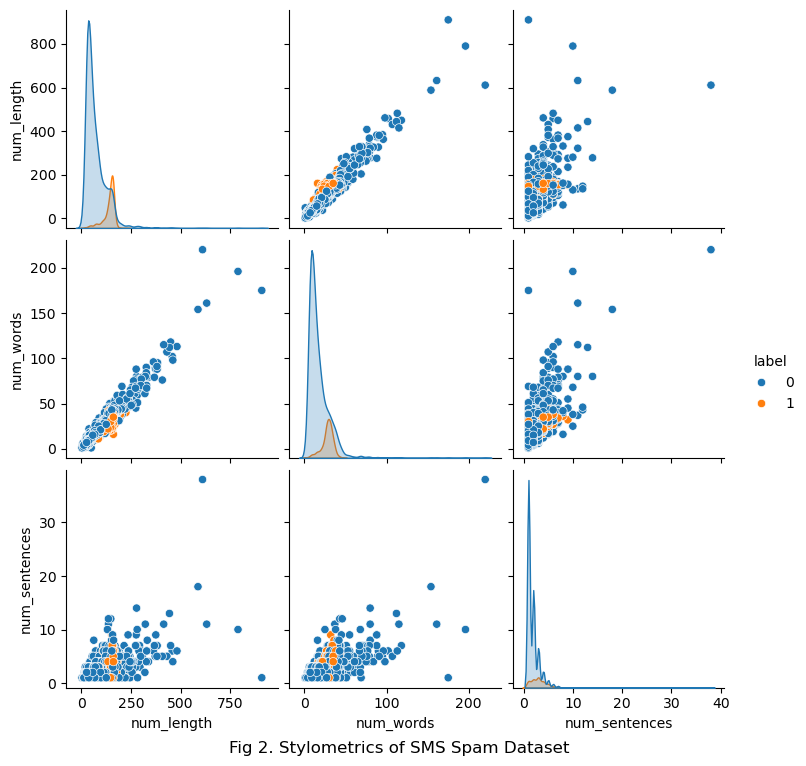

In [436]:
sns.pairplot(data,hue='label');

# Adding a title outside of the pairplot grid
plt.gcf().text(0.5, -0.01, "Fig 2. Stylometrics of SMS Spam Dataset",
               ha='center', fontsize=12)
plt.show()

In [437]:
data.describe()

,label,num_length,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000,5169.000000
mean,0.126330,78.977945,18.455794,1.965564
std,0.332253,58.236293,13.324758,1.448541
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,36.000000,9.000000,1.000000
50%,0.000000,60.000000,15.000000,1.000000
75%,0.000000,117.000000,26.000000,2.000000
max,1.000000,910.000000,220.000000,38.000000


### Proportionate Chance Criterion (PCC)

Another data exploration that we can do is to check the distribution of our samples in their respective class. From the graph below, we can see that our dataset is imbalanced with regular messages (0, ham) dominating our sample. Calculating its Proportionate Chance Criterion (PCC), it achieved *77.93 %* and a *$1.25PCC$* of *97.41%*. These numbers are quite high! Will our ML1 models can effectively handle an imbalanced data or do we need to introduce a new model? We will see in the next steps.

Population per class:      0
0  4516
1   653
Proportion Chance Criterion: 77.93%
1.25 * Proportion Chance Criterion: 97.41%


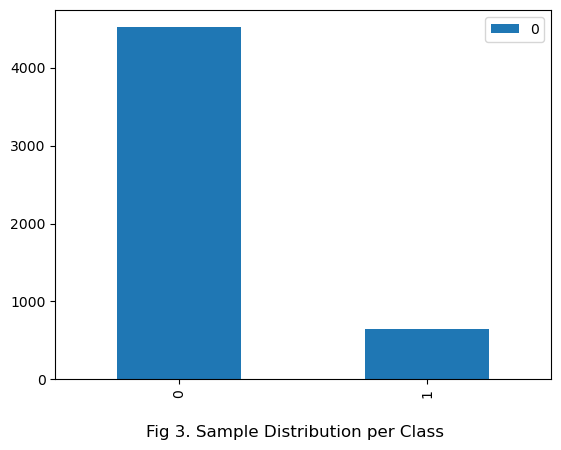

In [458]:
from collections import Counter
state_counts = Counter(data['label'])
df_state = pd.DataFrame.from_dict(state_counts, orient='index')
df_state.plot(kind='bar')
plt.gcf().text(0.5, -0.01, "Fig 3. Sample Distribution per Class",
               ha='center', fontsize=12)

num=(df_state[0]/df_state[0].sum())**2

print("Population per class:{}".format(df_state))

print("Proportion Chance Criterion: {:0.2f}%".format(100*num.sum()))
print(
    "1.25 * Proportion Chance Criterion: {:0.2f}%".format(1.25*100*num.sum()))

<h2 style="color:#ffffff; background-color:#a67c52; padding: 10px 0; text-align: left; font-weight: bold; padding-left: 20px;">Data Preparation</h2>

### Data Segregation

Next step is to split our dataset into a train-val set and a holdout test set. We will use 20% of the datapoints as our holdout set then the remaining 80% for our train-val set.

In [448]:
X = data['sms']
y = data['label']

from sklearn.model_selection import train_test_split

# Split the data into train+validation and test sets
X_train_val, X_test, y_train_val, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Further split the train+validation set into separate training and val sets
X_train, X_validation, y_train, y_validation = train_test_split(
    X_train_val, y_train_val, test_size=0.20, random_state=42)


### Text Vectorizing

When working with text data in machine learning, it is important to convert this data into a format that can be easily processed by our models. A common approach for this is using a 'Bag-of-Words' representation, where text data is transformed into vectors that capture the occurrence of words within the text. In our modeling, we will use and compare two specific techniques from the scikit-learn library: *CountVectorizer* and *TfidfVectorizer*. Both of these vectorization approaches will include steps to convert the text to lowercase and to remove punctuation.

Just as we follow the normalization rule of thumb, we will exclusively apply the fitting process to our training set to prevent any data leakage in both CountVectorizer and TfidVectorizer. Subsequently, the validation and test sets will be transformed based on the fitting applied to the training set.

**How do we choose which vectorizer technique is better?**

We will run our modeling on both approaches and compare the accuracy results. The technique that will yield the higher accuracy will be used on the GridSearch step to find the optimal parameters. 

#### CountVectorizer()

As learned in the Data Mining and Wrangling course, this technique converts text documents into vectors of word counts. Each element in the vector corresponds to the count of a specific word in the document. It is a straightforward method where the value in the vector represents how many times a word appears in the text.

For the parameters of CountVectorizer(), we used the following to reduce the noise of our data. 
- `min_df=5`:  A word must appear in at least 5 documents to be included. This filters out very rare words.
- `max_df=0.8`: A word must not appear in more than 80% of the documents. This excludes words that are too common across documents and might not be useful for analysis.
- `stop_words="english"`: Common English words such as 'a', 'an', 'the', and others are removed to avoid noise in the data.
- `token_pattern=r”(?u)\b\w\w\w+\b”`: Token is used to capture three or more alphanumeric characters.

In [514]:
from sklearn.feature_extraction.text import CountVectorizer

feature_extract_CV = CountVectorizer(
    min_df=5, 
    max_df=0.8, 
    stop_words="english",
    token_pattern=r"(?u)\b\w\w\w+\b"
)

X_train_CV = feature_extract_CV.fit_transform(X_train)
X_validation_CV = feature_extract_CV.transform(X_validation)
X_test_CV = feature_extract_CV.transform(X_test)

The transformed text is a Compressed  Sparse Row (CSR) object. CSR format stores the non-zero elements and their corresponding column indices. It does not waste memory storing the zeros. This is especially beneficial for large sparse matrices where most elements are zero like text.

In [515]:
X_train_CV

<3308x950 sparse matrix of type '<class 'numpy.int64'>'
	with 15543 stored elements in Compressed Sparse Row format>

After usign CountVectorizer, let us use this transformed data and train our ML1 models using their default parameters. We will also be using a new algorithm called **MultinomialNB** for this use case.

In [516]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB

# Classification models
LogRegL2 = LogisticRegression(penalty="l2")
LogRegL2.fit(X_train_CV, y_train)

LogRegL1 = LogisticRegression(penalty="l1", solver="liblinear")
LogRegL1.fit(X_train_CV, y_train)

LinearSVCL2 = LinearSVC(penalty="l2")
LinearSVCL2.fit(X_train_CV, y_train)

LinearSVCL1 = LinearSVC(penalty="l1", loss="squared_hinge", dual=False)
LinearSVCL1.fit(X_train_CV, y_train)

kNN = KNeighborsClassifier()
kNN.fit(X_train_CV, y_train)

RF = RandomForestClassifier()
RF.fit(X_train_CV, y_train)

GBM = GradientBoostingClassifier()
GBM.fit(X_train_CV, y_train)

MNB = MultinomialNB()
MNB.fit(X_train_CV, y_train)

# Make predictions on the validation set
y_pred_LogReg2 = LogRegL2.predict(X_validation_CV)
y_pred_LogReg1 = LogRegL1.predict(X_validation_CV)
y_pred_LinearSVCL2 = LinearSVCL2.predict(X_validation_CV)
y_pred_LinearSVCL1 = LinearSVCL1.predict(X_validation_CV)
y_pred_kNN = kNN.predict(X_validation_CV)
y_pred_RF = RF.predict(X_validation_CV)
y_pred_GBM = GBM.predict(X_validation_CV)
y_pred_MNB = MNB.predict(X_validation_CV)

# Make predictions on the test set
y_test_LogReg2 = LogRegL2.predict(X_test_CV)
y_test_LogReg1 = LogRegL1.predict(X_test_CV)
y_test_LinearSVCL2 = LinearSVCL2.predict(X_test_CV)
y_test_LinearSVCL1 = LinearSVCL1.predict(X_test_CV)
y_test_kNN = kNN.predict(X_test_CV)
y_test_RF = RF.predict(X_test_CV)
y_test_GBM = GBM.predict(X_test_CV)
y_test_MNB = MNB.predict(X_test_CV)

# Create a DataFrame to store the results
cols = [
    "Machine Learning Classification Method",
    "Train Accuracy",
    "Validation Accuracy",
    "Test Accuracy",
]
df_CV = pd.DataFrame(columns=cols)

df_CV.loc[0] = [
    "k-Nearest Neighbors",
    kNN.score(X_train_CV, y_train),
    kNN.score(X_validation_CV, y_validation),
    kNN.score(X_test_CV, y_test),
]
df_CV.loc[1] = [
    "Logistic Regression L2",
    LogRegL2.score(X_train_CV, y_train),
    LogRegL2.score(X_validation_CV, y_validation),
    LogRegL2.score(X_test_CV, y_test),
]
df_CV.loc[2] = [
    "Logistic Regression L1",
    LogRegL1.score(X_train_CV, y_train),
    LogRegL1.score(X_validation_CV, y_validation),
    LogRegL1.score(X_test_CV, y_test),
]
df_CV.loc[3] = [
    "Linear SVM L2",
    LinearSVCL2.score(X_train_CV, y_train),
    LinearSVCL2.score(X_validation_CV, y_validation),
    LinearSVCL2.score(X_test_CV, y_test),
]
df_CV.loc[4] = [
    "Linear SVM L1",
    LinearSVCL1.score(X_train_CV, y_train),
    LinearSVCL1.score(X_validation_CV, y_validation),
    LinearSVCL1.score(X_test_CV, y_test),
]
df_CV.loc[5] = [
    "Random Forest",
    RF.score(X_train_CV, y_train),
    RF.score(X_validation_CV, y_validation),
    RF.score(X_test_CV, y_test),
]
df_CV.loc[6] = [
    "Gradient Boosting Classifier",
    GBM.score(X_train_CV, y_train),
    GBM.score(X_validation_CV, y_validation),
    GBM.score(X_test_CV, y_test),
]
df_CV.loc[7] = [
    "Multinomial Naive Bayes",
    MNB.score(X_train_CV, y_train),
    MNB.score(X_validation_CV, y_validation),
    MNB.score(X_test_CV, y_test),
]

In [527]:
from IPython.display import display, HTML

# Apply centering style to the DataFrame
styled_df_CV = df_CV.style.set_table_attributes(
    "style='margin-left: auto; margin-right: auto;'"
)

# Display the styled DataFrame
display(styled_df_CV)

# Display the caption
display(
    HTML(
        """
        <center><i>Table 1. Modeling result (Default Parameters) using
        CountVectorizer() on one trial.</i></center>"""
    )
)

,Machine Learning Classification Method,Train Accuracy,Validation Accuracy,Test Accuracy
0,k-Nearest Neighbors,0.931681,0.923821,0.914894
1,Logistic Regression L2,0.985490,0.979444,0.979691
2,Logistic Regression L1,0.984281,0.975816,0.975822
3,Linear SVM L2,0.997582,0.979444,0.972921
4,Linear SVM L1,0.995163,0.975816,0.973888
5,Random Forest,0.999395,0.981862,0.968085
6,Gradient Boosting Classifier,0.973700,0.963724,0.957447
7,Multinomial Naive Bayes,0.982769,0.978235,0.974855


In general, all models perform well, with train accuracies ranging from around 93% to almost 100%, validation accuracies from around 92% to 97%, and test accuracies from around 91% to 97%. On the train accuracy, some models indicate signs of overfitting with values so close to 100% such as Random Forest and Linear SVM. Focusing on test accuracy, Logistic Regression L2 and L1 lead the group with 97.96% and 97.58%, respectively, followed closely by Multinomial Naive Bayes at 97.49%. This is not yet conclusive of the overall model performance since we only performed one trial.

Now let us try the TfidfVectorizer() and see whether it will further improve the results. 

#### TfidfVectorizer()

Term Frequency-inverse Document Frequency (TF-IDF) is a measure of importance of a word to a document in a collection or corpus, adjusted for the fact that some words appear more frequently in general.

Similar with CountVectorizer(), we will also use the same parameters to reduce the noise of our data as explained previously: `min_df=5`, `max_df=0.8`, `stop_words="english"`, ``token_pattern=r”(?u)\b\w\w\w+\b”``.

In [518]:
from sklearn.feature_extraction.text import TfidfVectorizer

feature_extract_TV = TfidfVectorizer(
    min_df=5,
    max_df=0.8,
    stop_words="english",
    token_pattern=r"(?u)\b\w\w\w+\b"
)
X_train_TV = feature_extract_TV.fit_transform(X_train)
X_validation_TV = feature_extract_TV.transform(X_validation)
X_test_TV = feature_extract_TV.transform(X_test)

In [519]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB

# Classification models
LogRegL2 = LogisticRegression(penalty="l2")
LogRegL2.fit(X_train_TV, y_train)

LogRegL1 = LogisticRegression(penalty="l1", solver="liblinear")
LogRegL1.fit(X_train_TV, y_train)

LinearSVCL2 = LinearSVC(penalty="l2")
LinearSVCL2.fit(X_train_TV, y_train)

LinearSVCL1 = LinearSVC(penalty="l1", loss="squared_hinge", dual=False)
LinearSVCL1.fit(X_train_TV, y_train)

kNN = KNeighborsClassifier()
kNN.fit(X_train_TV, y_train)

RF = RandomForestClassifier()
RF.fit(X_train_TV, y_train)

GBM = GradientBoostingClassifier()
GBM.fit(X_train_TV, y_train)

MNB = MultinomialNB()
MNB.fit(X_train_TV, y_train)

# Make predictions on the validation set
y_pred_LogReg2 = LogRegL2.predict(X_validation_TV)
y_pred_LogReg1 = LogRegL1.predict(X_validation_TV)
y_pred_LinearSVCL2 = LinearSVCL2.predict(X_validation_TV)
y_pred_LinearSVCL1 = LinearSVCL1.predict(X_validation_TV)
y_pred_kNN = kNN.predict(X_validation_TV)
y_pred_RF = RF.predict(X_validation_TV)
y_pred_GBM = GBM.predict(X_validation_TV)
y_pred_MNB = MNB.predict(X_validation_TV)

# Make predictions on the test set
y_test_LogReg2 = LogRegL2.predict(X_test_TV)
y_test_LogReg1 = LogRegL1.predict(X_test_TV)
y_test_LinearSVCL2 = LinearSVCL2.predict(X_test_TV)
y_test_LinearSVCL1 = LinearSVCL1.predict(X_test_TV)
y_test_kNN = kNN.predict(X_test_TV)
y_test_RF = RF.predict(X_test_TV)
y_test_GBM = GBM.predict(X_test_TV)
y_test_MNB = MNB.predict(X_test_TV)

# Create a DataFrame to store the results
cols = [
    "Machine Learning Classification Method",
    "Train Accuracy",
    "Validation Accuracy",
    "Test Accuracy",
]
df_TV = pd.DataFrame(columns=cols)

df_TV.loc[0] = [
    "k-Nearest Neighbors",
    kNN.score(X_train_CV, y_train),
    kNN.score(X_validation_CV, y_validation),
    kNN.score(X_test_CV, y_test),
]
df_TV.loc[1] = [
    "Logistic Regression L2",
    LogRegL2.score(X_train_CV, y_train),
    LogRegL2.score(X_validation_CV, y_validation),
    LogRegL2.score(X_test_CV, y_test),
]
df_TV.loc[2] = [
    "Logistic Regression L1",
    LogRegL1.score(X_train_CV, y_train),
    LogRegL1.score(X_validation_CV, y_validation),
    LogRegL1.score(X_test_CV, y_test),
]
df_TV.loc[3] = [
    "Linear SVM L2",
    LinearSVCL2.score(X_train_CV, y_train),
    LinearSVCL2.score(X_validation_CV, y_validation),
    LinearSVCL2.score(X_test_CV, y_test),
]
df_TV.loc[4] = [
    "Linear SVM L1",
    LinearSVCL1.score(X_train_CV, y_train),
    LinearSVCL1.score(X_validation_CV, y_validation),
    LinearSVCL1.score(X_test_CV, y_test),
]
df_TV.loc[5] = [
    "Random Forest",
    RF.score(X_train_CV, y_train),
    RF.score(X_validation_CV, y_validation),
    RF.score(X_test_CV, y_test),
]
df_TV.loc[6] = [
    "Gradient Boosting Classifier",
    GBM.score(X_train_CV, y_train),
    GBM.score(X_validation_CV, y_validation),
    GBM.score(X_test_CV, y_test),
]
df_TV.loc[7] = [
    "Multinomial Naive Bayes",
    MNB.score(X_train_CV, y_train),
    MNB.score(X_validation_CV, y_validation),
    MNB.score(X_test_CV, y_test),
]

In [526]:
from IPython.display import display, HTML

# Apply centering style to the DataFrame
styled_df_TV = df_TV.style.set_table_attributes(
    "style='margin-left: auto; margin-right: auto;'"
)

# Display the styled DataFrame
display(styled_df_TV)

# Display the caption
display(
    HTML(
        """<center><i>Table 2. Modeling result (Default Parameters) using
        TfidfVectorizer() on one trial.</i></center>"""
    )
)

,Machine Learning Classification Method,Train Accuracy,Validation Accuracy,Test Accuracy
0,k-Nearest Neighbors,0.963724,0.964933,0.955513
1,Logistic Regression L2,0.981862,0.979444,0.970019
2,Logistic Regression L1,0.954051,0.958888,0.946809
3,Linear SVM L2,0.990931,0.966143,0.956480
4,Linear SVM L1,0.977932,0.967352,0.960348
5,Random Forest,0.985490,0.954051,0.958414
6,Gradient Boosting Classifier,0.965538,0.961306,0.958414
7,Multinomial Naive Bayes,0.984885,0.979444,0.976789


In summary, the models' test accuracies are all fairly high, ranging from approximately 94.68% to 97.67%. These models are generally performing well, though the Multinomial Naive Bayes and Logistic Regression L2 stand out with the highest test accuracies at 97.68% and 97.00% respectively. 

### Text Vectorizing Comparison


To determine which vectorizing technique yields better results, let us consider consider the accuracy across all our data on train, validation and test. To calculate the overall accuracy, we use the computation below similar with the weights given on our first ML competition in class.

$Overall = Train Accuracy * 0.10 + Validation Accuracy * 0.40 + Test Accuracy * 0.50$

In [548]:
df_CV['Overall'] = df_CV['Train Accuracy']*0.10 + df_CV['Validation Accuracy']*0.40 + df_CV['Test Accuracy']*0.50

# Apply centering style to the DataFrame
styled_df_CV2 = df_CV.style.set_table_attributes(
    "style='margin-left: auto; margin-right: auto;'"
)

# Display the styled DataFrame
display(styled_df_CV2)

# Display the caption
display(
    HTML(
        """<center><i>Table 3. Overall modeling result (Default Parameters) using
        CountVectorizer() on one trial.</i></center>"""
    )
)

,Machine Learning Classification Method,Train Accuracy,Validation Accuracy,Test Accuracy,Overall
0,k-Nearest Neighbors,0.931681,0.923821,0.914894,0.920143
1,Logistic Regression L2,0.985490,0.979444,0.979691,0.980172
2,Logistic Regression L1,0.984281,0.975816,0.975822,0.976666
3,Linear SVM L2,0.997582,0.979444,0.972921,0.977996
4,Linear SVM L1,0.995163,0.975816,0.973888,0.976787
5,Random Forest,0.999395,0.981862,0.968085,0.976727
6,Gradient Boosting Classifier,0.973700,0.963724,0.957447,0.961583
7,Multinomial Naive Bayes,0.982769,0.978235,0.974855,0.976998


In [555]:
df_TV['Overall'] = df_TV['Train Accuracy']*0.64 + df_TV['Validation Accuracy']*0.16 + df_TV['Test Accuracy']*0.20

# Apply centering style to the DataFrame
styled_df_TV2 = df_TV.style.set_table_attributes(
    "style='margin-left: auto; margin-right: auto;'"
)

# Display the styled DataFrame
display(styled_df_TV2)

# Display the caption
display(
    HTML(
        """<center><i>Table 4. Overall modeling result (Default Parameters) using
        TfidfVectorizer() on one trial.</i></center>"""
    )
)

,Machine Learning Classification Method,Train Accuracy,Validation Accuracy,Test Accuracy,Overall
0,k-Nearest Neighbors,0.963724,0.964933,0.955513,0.962275
1,Logistic Regression L2,0.981862,0.979444,0.970019,0.979107
2,Logistic Regression L1,0.954051,0.958888,0.946809,0.953376
3,Linear SVM L2,0.990931,0.966143,0.956480,0.980075
4,Linear SVM L1,0.977932,0.967352,0.960348,0.972723
5,Random Forest,0.985490,0.954051,0.958414,0.975044
6,Gradient Boosting Classifier,0.965538,0.961306,0.958414,0.963436
7,Multinomial Naive Bayes,0.984885,0.979444,0.976789,0.982395


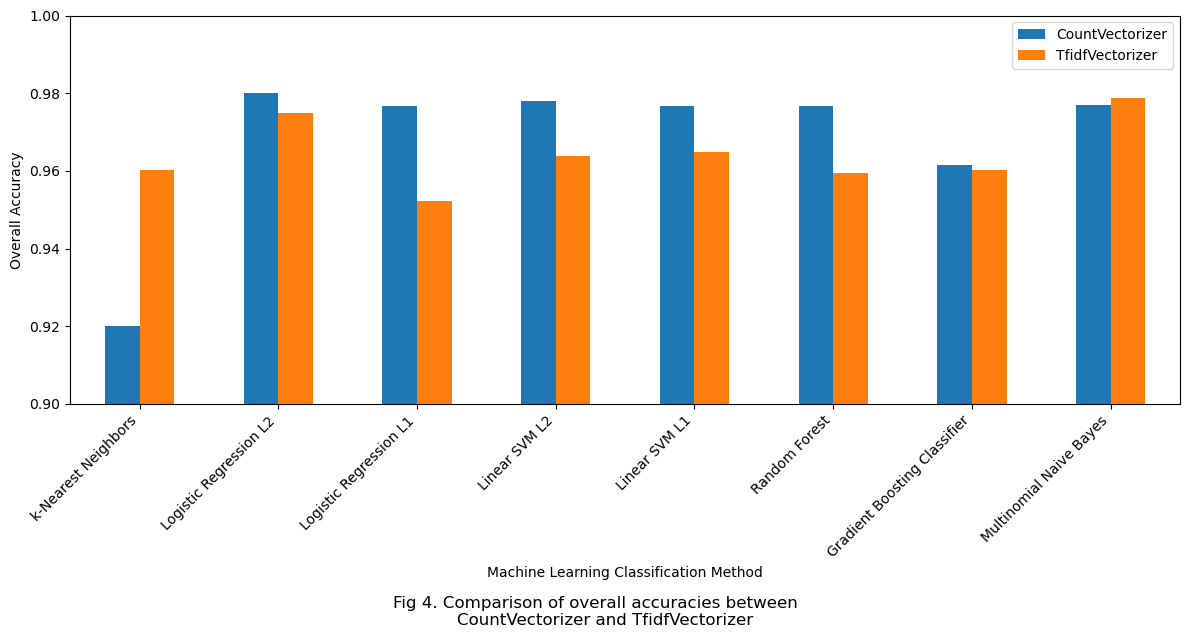

In [550]:
df_comparison = pd.DataFrame({
    'ML Model': df_CV['Machine Learning Classification Method'],
    'CountVectorizer': df_CV['Overall'],
    'TfidfVectorizer': df_TV['Overall'] 
})

df_comparison.set_index('ML Model', inplace=True)
ax = df_comparison.plot(kind='bar', figsize=(12, 6), ylim=(0.90, 1.00))
ax.set_ylabel('Overall Accuracy')
ax.set_xlabel('Machine Learning Classification Method')
plt.xticks(rotation=45, ha='right')
plt.gcf().text(
    0.5, -0.05,
    """Fig 4. Comparison of overall accuracies between
    CountVectorizer and TfidfVectorizer""", ha='center', fontsize=12)
plt.tight_layout()
plt.show()


Based on the overall results, **six out of eight models show better accuracy when the dataset is subjected to CountVectorizer than under TfidfVectorizer**. Meanwhile, only k-Nearest Neighbors (kNN) and Multinomial Naive Bayes improve when the dataset is transformed using TfidfVectorizer.

From these findings, let us use CountVectorizer in the model training.

<h2 style="color:#ffffff; background-color:#a67c52; padding: 10px 0; text-align: left; font-weight: bold; padding-left: 20px;">Model Training</h2>

By using `GridSearchCV` and `Pipeline`, we can identify the best parameters of our algorithm that will help generate the highest accuracy. It is defined in the code below.

In [560]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.dummy import DummyClassifier

C_range = [1.e-05, 1.e-03, 1.e-01, 1.e+01, 1.e+03, 1.e+05]
alpha_range = [1.e-05, 1.e-03, 1.e-01, 1.0, 1.e+01, 1.e+03, 1.e+05]
max_depth_range = [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
learning_rate_range = [0.1, 0.5, 1.0]
n_neighbor_range = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

# Define the pipeline with CountVectorizer
pipe = Pipeline(
    [('vectorizer', CountVectorizer(
    min_df=5,
    max_df=0.8,
    stop_words="english",
    token_pattern=r"(?u)\b\w\w\w+\b")), ('clf', DummyClassifier())])
# Define the parameter grid
param_grid = [
    {'clf': [LogisticRegression()],
     'clf__penalty': ['l1', 'l2'],
     'clf__C': C_range, 
     'clf__solver': ['liblinear']},

    {'clf': [LinearSVC()],
     'clf__penalty': ['l1', 'l2'],
     'clf__C': C_range, 
     'clf__dual': [False]},

    {'clf': [KNeighborsClassifier()],
     'clf__n_neighbors': n_neighbor_range},

    {'clf': [RandomForestClassifier()],
     'clf__max_depth': max_depth_range},

    {'clf': [GradientBoostingClassifier()],
     'clf__learning_rate': learning_rate_range,
     'clf__max_depth': max_depth_range},

    {'clf': [MultinomialNB()],
     'clf__alpha': alpha_range,
    }
]
# Create GridSearchCV
grid_search = GridSearchCV(pipe, param_grid, cv=5, return_train_score=True)
# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Best estimator
print("Best estimator:", grid_search.best_estimator_)

Best estimator: Pipeline(steps=[('vectorizer',
                 CountVectorizer(max_df=0.8, min_df=5, stop_words='english',
                                 token_pattern='(?u)\\b\\w\\w\\w+\\b')),
                ('clf', MultinomialNB(alpha=10.0))])


In [561]:
cv_results = pd.DataFrame(grid_search.__dict__['cv_results_'])
cv_results_top5 = cv_results.sort_values(
    'mean_test_score', ascending=False).head()

# Apply centering style to the DataFrame
styled_cv_results = cv_results_top5.style.set_table_attributes(
    "style='margin-left: auto; margin-right: auto;'"
)

# Display the styled DataFrame
display(styled_cv_results)

# Display the caption
display(
    HTML("""<center><i>Table 5. GridSearch result of top 5 models
         with CountVectorizer.</i></center>"""
    )
)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_clf,param_clf__C,param_clf__penalty,param_clf__solver,param_clf__dual,param_clf__n_neighbors,param_clf__max_depth,param_clf__learning_rate,param_clf__alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
82,0.039828,0.001257,0.008884,0.000342,MultinomialNB(),nan,nan,nan,nan,nan,nan,nan,10.000000,"{'clf': MultinomialNB(), 'clf__alpha': 10.0}",0.980363,0.972810,0.978852,0.984871,0.968230,0.977025,0.005851,1,0.981104,0.981859,0.980726,0.979977,0.984133,0.981560,0.001423
80,0.040541,0.001598,0.008778,0.000157,MultinomialNB(),nan,nan,nan,nan,nan,nan,nan,0.100000,"{'clf': MultinomialNB(), 'clf__alpha': 0.1}",0.969789,0.972810,0.974320,0.981846,0.974281,0.974609,0.003976,2,0.983749,0.980726,0.982615,0.980733,0.982622,0.982089,0.001184
81,0.039774,0.000958,0.008729,0.000380,MultinomialNB(),nan,nan,nan,nan,nan,nan,nan,1.000000,"{'clf': MultinomialNB(), 'clf__alpha': 1.0}",0.971299,0.972810,0.977341,0.978820,0.969743,0.974003,0.003499,3,0.982993,0.981859,0.981859,0.979977,0.983377,0.982013,0.001184
79,0.040334,0.001118,0.008875,0.000343,MultinomialNB(),nan,nan,nan,nan,nan,nan,nan,0.001000,"{'clf': MultinomialNB(), 'clf__alpha': 0.001}",0.966767,0.972810,0.974320,0.981846,0.972769,0.973702,0.004826,4,0.984127,0.981104,0.982993,0.980733,0.983377,0.982467,0.001321
78,0.040452,0.001501,0.009139,0.000554,MultinomialNB(),nan,nan,nan,nan,nan,nan,nan,0.000010,"{'clf': MultinomialNB(), 'clf__alpha': 1e-05}",0.966767,0.972810,0.974320,0.981846,0.969743,0.973097,0.005088,5,0.984127,0.981104,0.982993,0.980733,0.983755,0.982542,0.001381


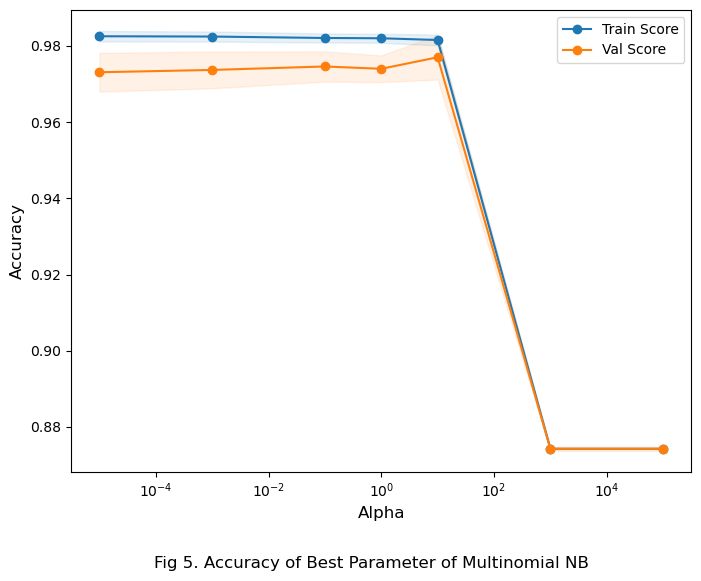

In [570]:
best_model_df = cv_results.loc[cv_results.param_clf.astype(str) == 'MultinomialNB()']
params = best_model_df.param_clf__alpha.astype(float)
mean_train = best_model_df.mean_train_score
mean_val = best_model_df.mean_test_score
train_std = best_model_df.std_train_score
val_std = best_model_df.std_test_score

fig, ax = plt.subplots(figsize=(8, 6))
ax.set_xscale('log')
ax.plot(params, mean_train, 'o-', color='tab:blue', label='Train Score')
ax.plot(params, mean_val, 'o-', color='tab:orange', label='Val Score')
ax.fill_between(
    params,
    mean_train + train_std,
    mean_train - train_std,
    color='tab:blue', alpha=0.10
)
ax.fill_between(
    params,
    mean_val + val_std,
    mean_val - val_std,
    color='tab:orange', alpha=0.10
)
ax.legend()
ax.set_xlabel('Alpha', fontsize=12)
ax.set_ylabel(r'Accuracy', fontsize=12)
plt.gcf().text(
    0.5, -0.05, "Fig 5. Accuracy of Best Parameter of Multinomial NB",
    ha='center', fontsize=12);

According to the result of GridSearchCV, the best estimator for our model is **MultinomialNB with the parameter alpha=10 using CountVectorizer with a mean test score of 97.70%.**

### Interlude: Selecting TfidfVectorizer

To validate our prevous decision, let us try to apply TfidfVectorizer in another pipeline. 

In [562]:
from sklearn.pipeline import Pipeline
from sklearn.dummy import DummyClassifier

# Define the pipeline with CountVectorizer
pipe2 = Pipeline(
    [('vectorizer', TfidfVectorizer(
    min_df=5,
    max_df=0.8,
    stop_words="english",
    token_pattern=r"(?u)\b\w\w\w+\b")), ('clf', DummyClassifier())])
# Define the parameter grid
param_grid2 = [
    {'clf': [LogisticRegression()],
     'clf__penalty': ['l1', 'l2'],
     'clf__C': C_range, 
     'clf__solver': ['liblinear']},

    {'clf': [LinearSVC()], 
     'clf__penalty': ['l1', 'l2'],
     'clf__C': C_range, 
     'clf__dual': [False]},

    {'clf': [KNeighborsClassifier()], 
     'clf__n_neighbors': n_neighbor_range},

    {'clf': [RandomForestClassifier()], 
     'clf__max_depth': max_depth_range},

    {'clf': [GradientBoostingClassifier()], 
     'clf__learning_rate': learning_rate_range, 
     'clf__max_depth': max_depth_range},

    {'clf': [MultinomialNB()],
     'clf__alpha': alpha_range,
    }
]
# Create GridSearchCV
grid_search2 = GridSearchCV(pipe2, param_grid2, cv=5, return_train_score=True)
# Fit the grid search to the data
grid_search2.fit(X_train, y_train)

# Best estimator
print("Best estimator:", grid_search2.best_estimator_)

Best estimator: Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(max_df=0.8, min_df=5, stop_words='english',
                                 token_pattern='(?u)\\b\\w\\w\\w+\\b')),
                ('clf', MultinomialNB(alpha=0.1))])


In [574]:
cv_results2 = pd.DataFrame(grid_search2.__dict__['cv_results_'])
cv_results2_top5 = cv_results2.sort_values(
    'mean_test_score', ascending=False).head()

# Apply centering style to the DataFrame
styled_cv_results2 = cv_results2_top5.style.set_table_attributes(
    "style='margin-left: auto; margin-right: auto;'"
)

# Display the styled DataFrame
display(styled_cv_results2)

# Display the caption
display(
    HTML("""<center><i>Table 6. GridSearch result of top 5 models
         with TfidfVectorizer.</i></center>"""
    )
)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_clf,param_clf__C,param_clf__penalty,param_clf__solver,param_clf__dual,param_clf__n_neighbors,param_clf__max_depth,param_clf__learning_rate,param_clf__alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
80,0.042257,0.001043,0.010091,0.000315,MultinomialNB(),nan,nan,nan,nan,nan,nan,nan,0.100000,"{'clf': MultinomialNB(), 'clf__alpha': 0.1}",0.968278,0.975831,0.978852,0.980333,0.974281,0.975515,0.004203,1,0.984505,0.983749,0.982615,0.981111,0.985266,0.983449,0.001461
79,0.041702,0.000906,0.010124,0.000203,MultinomialNB(),nan,nan,nan,nan,nan,nan,nan,0.001000,"{'clf': MultinomialNB(), 'clf__alpha': 0.001}",0.968278,0.975831,0.974320,0.977307,0.969743,0.973096,0.003498,2,0.985639,0.984505,0.984505,0.981866,0.985266,0.984356,0.001320
7,0.048637,0.001244,0.010644,0.000809,LogisticRegression(),10.000000,l2,liblinear,nan,nan,nan,nan,nan,"{'clf': LogisticRegression(), 'clf__C': 10.0, 'clf__penalty': 'l2', 'clf__solver': 'liblinear'}",0.980363,0.965257,0.974320,0.977307,0.965204,0.972490,0.006228,3,0.993575,0.995087,0.990930,0.990933,0.993578,0.992821,0.001638
81,0.041326,0.000919,0.010599,0.000736,MultinomialNB(),nan,nan,nan,nan,nan,nan,nan,1.000000,"{'clf': MultinomialNB(), 'clf__alpha': 1.0}",0.975831,0.968278,0.977341,0.978820,0.962179,0.972490,0.006306,4,0.978080,0.979214,0.977324,0.978088,0.982244,0.978990,0.001735
78,0.040588,0.001161,0.010057,0.000194,MultinomialNB(),nan,nan,nan,nan,nan,nan,nan,0.000010,"{'clf': MultinomialNB(), 'clf__alpha': 1e-05}",0.966767,0.971299,0.972810,0.977307,0.969743,0.971585,0.003491,5,0.985639,0.984505,0.984505,0.981866,0.985266,0.984356,0.001320


Comparing the mean test score, the result from the GridSearch that went through **CountVectorizer is still slightly higher at 97.70% as compared with TfidfVectorizer at 97.55%.**

<h2 style="color:#ffffff; background-color:#a67c52; padding: 10px 0; text-align: left; font-weight: bold; padding-left: 20px;">Final Model Testing</h2>

Using the best parameters obtained from the GridSearch with CountVectorizer, let us apply these into our algorithms. 

In [587]:
X = data['sms']
y = data['label']

from sklearn.model_selection import train_test_split

# Split the data into train+validation and test sets
X_train_val, X_test, y_train_val, y_test = train_test_split(
    X, y, test_size=0.2, random_state=143)

# Further split the train+validation set into separate training and val sets
X_train, X_validation, y_train, y_validation = train_test_split(
    X_train_val, y_train_val, test_size=0.20, random_state=143)

from sklearn.feature_extraction.text import CountVectorizer

feature_extract_CV = CountVectorizer(
    min_df=5, 
    max_df=0.8, 
    stop_words="english",
    token_pattern=r"(?u)\b\w\w\w+\b"
)

X_train_CV = feature_extract_CV.fit_transform(X_train)
X_validation_CV = feature_extract_CV.transform(X_validation)
X_test_CV = feature_extract_CV.transform(X_test)

In [588]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB

# Classification models
LogRegL2 = LogisticRegression(penalty="l2", solver='liblinear', C=10)
LogRegL2.fit(X_train_CV, y_train)

LogRegL1 = LogisticRegression(penalty="l1", solver='liblinear', C=10)
LogRegL1.fit(X_train_CV, y_train)

LinearSVCL2 = LinearSVC(penalty="l2", C=0.1, dual=False)
LinearSVCL2.fit(X_train_CV, y_train)

LinearSVCL1 = LinearSVC(penalty="l1", C=10, dual=False)
LinearSVCL1.fit(X_train_CV, y_train)

kNN = KNeighborsClassifier(n_neighbors=1)
kNN.fit(X_train_CV, y_train)

RF = RandomForestClassifier(max_depth=15)
RF.fit(X_train_CV, y_train)

GBM = GradientBoostingClassifier(max_depth=13, learning_rate=0.5)
GBM.fit(X_train_CV, y_train)

MNB = MultinomialNB(alpha=10.0)
MNB.fit(X_train_CV, y_train)

# Make predictions on the validation set
y_pred_LogReg2 = LogRegL2.predict(X_validation_CV)
y_pred_LogReg1 = LogRegL1.predict(X_validation_CV)
y_pred_LinearSVCL2 = LinearSVCL2.predict(X_validation_CV)
y_pred_LinearSVCL1 = LinearSVCL1.predict(X_validation_CV)
y_pred_kNN = kNN.predict(X_validation_CV)
y_pred_RF = RF.predict(X_validation_CV)
y_pred_GBM = GBM.predict(X_validation_CV)
y_pred_MNB = MNB.predict(X_validation_CV)

# Make predictions on the test set
y_test_LogReg2 = LogRegL2.predict(X_test_CV)
y_test_LogReg1 = LogRegL1.predict(X_test_CV)
y_test_LinearSVCL2 = LinearSVCL2.predict(X_test_CV)
y_test_LinearSVCL1 = LinearSVCL1.predict(X_test_CV)
y_test_kNN = kNN.predict(X_test_CV)
y_test_RF = RF.predict(X_test_CV)
y_test_GBM = GBM.predict(X_test_CV)
y_test_MNB = MNB.predict(X_test_CV)

# Create a DataFrame to store the results
cols = ['Machine Learning Classification Method', 'Train Accuracy', 'Validation Accuracy', 'Test Accuracy']
df_final = pd.DataFrame(columns=cols)

df_final.loc[0] = ['k-Nearest Neighbors', kNN.score(X_train_CV, y_train), kNN.score(X_validation_CV, y_validation), kNN.score(X_test_CV, y_test)]
df_final.loc[1] = ['Logistic Regression L2', LogRegL2.score(X_train_CV, y_train), LogRegL2.score(X_validation_CV, y_validation), LogRegL2.score(X_test_CV, y_test)]
df_final.loc[2] = ['Logistic Regression L1', LogRegL1.score(X_train_CV, y_train), LogRegL1.score(X_validation_CV, y_validation), LogRegL1.score(X_test_CV, y_test)]
df_final.loc[3] = ['Linear SVM L2', LinearSVCL2.score(X_train_CV, y_train), LinearSVCL2.score(X_validation_CV, y_validation), LinearSVCL2.score(X_test_CV, y_test)]
df_final.loc[4] = ['Linear SVM L1', LinearSVCL1.score(X_train_CV, y_train), LinearSVCL1.score(X_validation_CV, y_validation), LinearSVCL1.score(X_test_CV, y_test)]
df_final.loc[5] = ['Random Forest', RF.score(X_train_CV, y_train), RF.score(X_validation_CV, y_validation), RF.score(X_test_CV, y_test)]
df_final.loc[6] = ['Gradient Boosting Classifier', GBM.score(X_train_CV, y_train), GBM.score(X_validation_CV, y_validation), GBM.score(X_test_CV, y_test)]
df_final.loc[7] = ['Multinomial Naive Bayes', MNB.score(X_train_CV, y_train), MNB.score(X_validation_CV, y_validation), MNB.score(X_test_CV, y_test)]

df_final


,Machine Learning Classification Method,Train Accuracy,Validation Accuracy,Test Accuracy
0,k-Nearest Neighbors,0.999395,0.940750,0.953578
1,Logistic Regression L2,0.997582,0.973398,0.972921
2,Logistic Regression L1,0.998791,0.957678,0.970986
3,Linear SVM L2,0.988513,0.975816,0.975822
4,Linear SVM L1,0.999395,0.956469,0.971954
5,Random Forest,0.961004,0.948005,0.947776
6,Gradient Boosting Classifier,0.999395,0.961306,0.969052
7,Multinomial Naive Bayes,0.980048,0.978235,0.979691


Using the best parameters for all algorithms from the GridSearch, Logistic Regression, GBM, and Linear SVM L1 are almost overfitting with almost 100% accuracy. In terms of test accuracy, Multinomial NB still leads with 97.96%

<h2 style="color:#ffffff; background-color:#a67c52; padding: 10px 0; text-align: left; font-weight: bold; padding-left: 20px;">Model Evaluation</h2>

Let us evaluate our model by assessing its overall accuracy, processing time, precision, recall, F1 score, and top predictor. 

### Accuracy, Precision Recall and F1 score

In [589]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision_recall_f1 = {
    'kNN': (precision_score(y_test, y_test_kNN), recall_score(y_test, y_test_kNN), f1_score(y_test, y_test_kNN)),
    'LogRegL2': (precision_score(y_test, y_test_LogReg2), recall_score(y_test, y_test_LogReg2), f1_score(y_test, y_test_LogReg2)),
    'LogRegL1': (precision_score(y_test, y_test_LogReg1), recall_score(y_test, y_test_LogReg1), f1_score(y_test, y_test_LogReg1)),
    'LinearSVCL2': (precision_score(y_test, y_test_LinearSVCL2), recall_score(y_test, y_test_LinearSVCL2), f1_score(y_test, y_test_LinearSVCL2)),
    'LinearSVCL1': (precision_score(y_test, y_test_LinearSVCL1), recall_score(y_test, y_test_LinearSVCL1), f1_score(y_test, y_test_LinearSVCL1)),
    'RF': (precision_score(y_test, y_test_RF), recall_score(y_test, y_test_RF), f1_score(y_test, y_test_RF)),
    'GBM': (precision_score(y_test, y_test_GBM), recall_score(y_test, y_test_GBM), f1_score(y_test, y_test_GBM)),
    'MNB': (precision_score(y_test, y_test_MNB), recall_score(y_test, y_test_MNB), f1_score(y_test, y_test_MNB))
}

# Create a DataFrame to store the results
cols = ['Machine Learning Classification Method', 'Train Accuracy', 'Validation Accuracy', 'Test Accuracy', 'Precision', 'Recall', 'F1 Score']
df_final_metrics = pd.DataFrame(columns=cols)

# Populate the DataFrame
for i, (model_name, scores) in enumerate(precision_recall_f1.items()):
    train_accuracy = eval(model_name).score(X_train_CV, y_train)
    validation_accuracy = eval(model_name).score(X_validation_CV, y_validation)
    test_accuracy = eval(model_name).score(X_test_CV, y_test)
    precision, recall, f1 = scores
    df_final_metrics.loc[i] = [model_name, train_accuracy, validation_accuracy, test_accuracy, precision, recall, f1]

df_final_metrics


,Machine Learning Classification Method,Train Accuracy,Validation Accuracy,Test Accuracy,Precision,Recall,F1 Score
0,kNN,0.999395,0.940750,0.953578,0.944444,0.664062,0.779817
1,LogRegL2,0.997582,0.973398,0.972921,0.954545,0.820312,0.882353
2,LogRegL1,0.998791,0.957678,0.970986,0.922414,0.835938,0.877049
3,LinearSVCL2,0.988513,0.975816,0.975822,1.000000,0.804688,0.891775
4,LinearSVCL1,0.999395,0.956469,0.971954,0.902439,0.867188,0.884462
5,RF,0.961004,0.948005,0.947776,1.000000,0.578125,0.732673
6,GBM,0.999395,0.961306,0.969052,0.944444,0.796875,0.864407
7,MNB,0.980048,0.978235,0.979691,0.973451,0.859375,0.912863


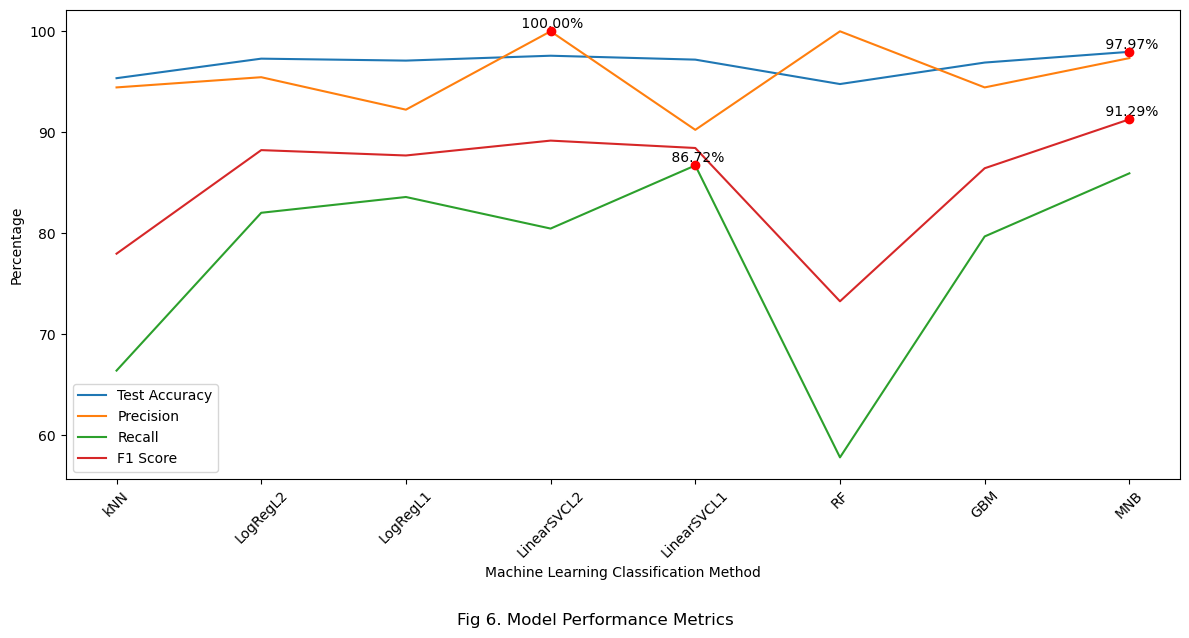

In [604]:
# Convert the scores to percentages
df_final_metrics_percentage = df_final_metrics.copy()
for metric in ["Test Accuracy", "Precision", "Recall", "F1 Score"]:
    df_final_metrics_percentage[metric] = df_final_metrics_percentage[
        metric] * 100

# Plotting with percentages
fig, ax = plt.subplots(figsize=(12, 6))
# Plot each metric as a percentage
for metric in ["Test Accuracy", "Precision", "Recall", "F1 Score"]:
    ax.plot(
        df_final_metrics_percentage["Machine Learning Classification Method"],
        df_final_metrics_percentage[metric],
        label=metric,
    )

    # Highlight the highest point for each metric
    highest_metric_value = df_final_metrics_percentage[metric].max()
    highest_metric_model = df_final_metrics_percentage.loc[
        df_final_metrics_percentage[metric].idxmax(),
        "Machine Learning Classification Method",
    ]
    ax.scatter(highest_metric_model, highest_metric_value, color="red",
               zorder=5)
    ax.text(
        highest_metric_model,
        highest_metric_value,
        f" {highest_metric_value:.2f}%",
        color="black",
        ha="center",
        va="bottom",
    )

ax.set_xlabel("Machine Learning Classification Method", fontsize=10)
ax.set_ylabel("Percentage", fontsize=10)
ax.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.gcf().text(0.5, -0.05,
               "Fig 6. Model Performance Metrics", ha="center", fontsize=12)
plt.show();

The line graph shows the performance of various machine learning classification methods across four different metrics: Test Accuracy, Precision, Recall, and F1 Score. We emphasize on F1 Score to give both weight and importance to precision and recall. On this metric, Multinomial NB leads with a 91.29% F1 score. Furthermore, it also leads on the test accuracy with 97.97%

### Multinomial NB (Best Model) Confusion Matrix

[[903   3]
 [ 18 110]]


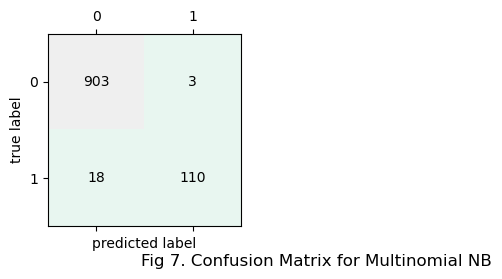

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       906
           1       0.97      0.86      0.91       128

    accuracy                           0.98      1034
   macro avg       0.98      0.93      0.95      1034
weighted avg       0.98      0.98      0.98      1034



In [626]:
from sklearn.metrics import confusion_matrix

MNB = MultinomialNB(alpha=10.0)
MNB.fit(X_train_CV, y_train)

y_pred_MNB = MNB.predict(X_validation_CV)

y_pred = MNB.predict(X_test_CV)
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print(confmat)

fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Pastel2, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')
plt.xlabel('predicted label')
plt.ylabel('true label')
plt.gcf().text(0.5, -0.05,
               "Fig 7. Confusion Matrix for Multinomial NB", fontsize=12)
plt.show()

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

### GridSearch Processing Time

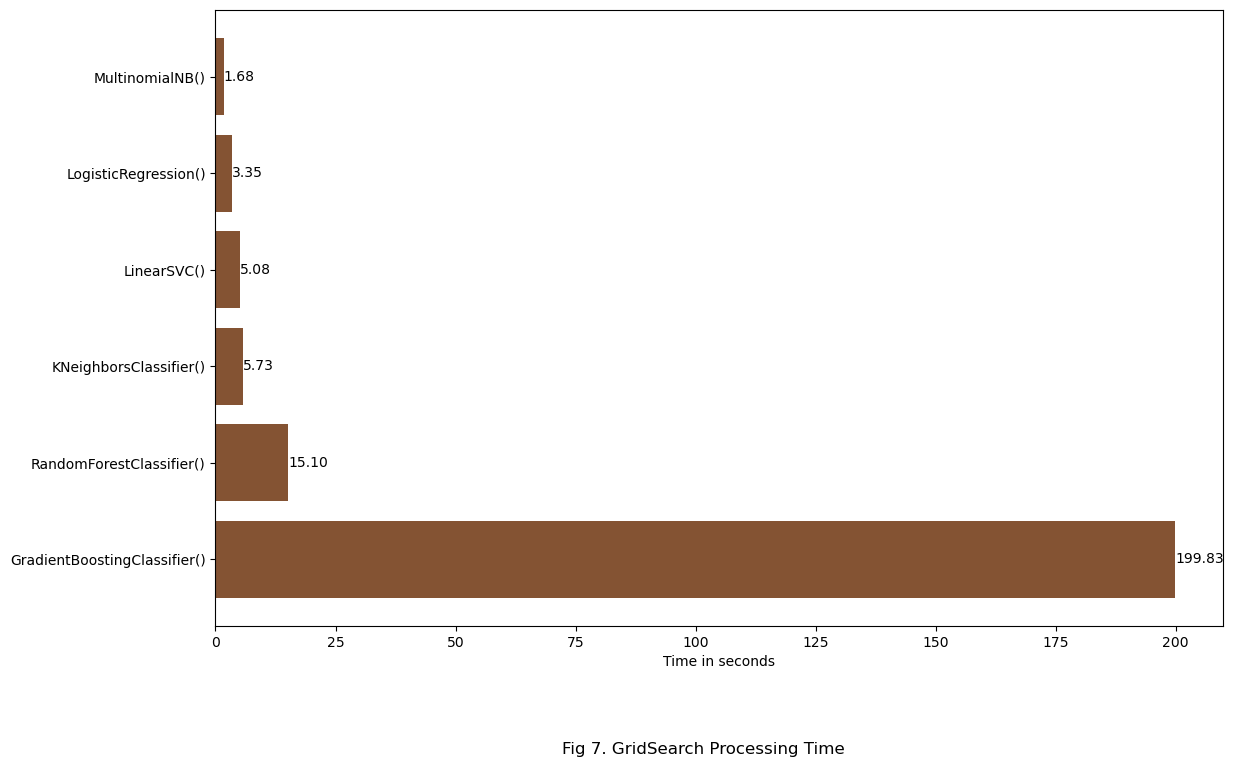

In [617]:
cv_results['total_time'] = cv_results['mean_fit_time']*5 + cv_results['mean_score_time']*5

grid_search_proc_time = cv_results.groupby(
    'param_clf', sort=False)['total_time'].sum()
grid_search_proc_time

classifiers = list(grid_search_proc_time.index)
times = list(grid_search_proc_time.values)

plt.figure(figsize=(13, 8))
bars = plt.barh(sorted_classifiers_desc, sorted_times_desc, color='#845333')
plt.xlabel('Time in seconds')
plt.grid(False)

# Add the data values to each bar
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, 
             f'{bar.get_width():.2f}', 
             va='center', ha='left', fontsize=10)

plt.gcf().text(0.5, -0.05,
               "Fig 7. GridSearch Processing Time", ha="center", fontsize=12)
plt.show()


In terms of processing time, Multinomial NB is a clear winner with the fastest time to process in GridSearch. Meanwhile, GradientBoosting is the slowest among these methods. 

### Multinomial NB Best Model Top Predictor

In [620]:
from sklearn.feature_extraction.text import CountVectorizer

feature_names = feature_extract_CV.get_feature_names_out()
feature_log_prob = MNB.feature_log_prob_

top_n = 20
for i, class_prob in enumerate(feature_log_prob):
    sorted_indices = np.argsort(class_prob)[::-1][:top_n]
    top_features = [feature_names[index] for index in sorted_indices]
    print(f"Top {top_n} predictors for class {i}: {top_features}")


Top 20 predictors for class 0: ['just', 'know', 'like', 'got', 'come', 'good', 'time', 'want', 'day', 'going', 'love', 'home', 'lor', 'need', 'don', 'sorry', 'think', 'dont', 'today', 'did']
Top 20 predictors for class 1: ['free', 'txt', 'stop', 'text', 'mobile', 'reply', 'claim', 'www', 'prize', 'new', 'just', 'nokia', '150p', 'cash', 'send', 'won', 'service', 'win', 'tone', 'phone']


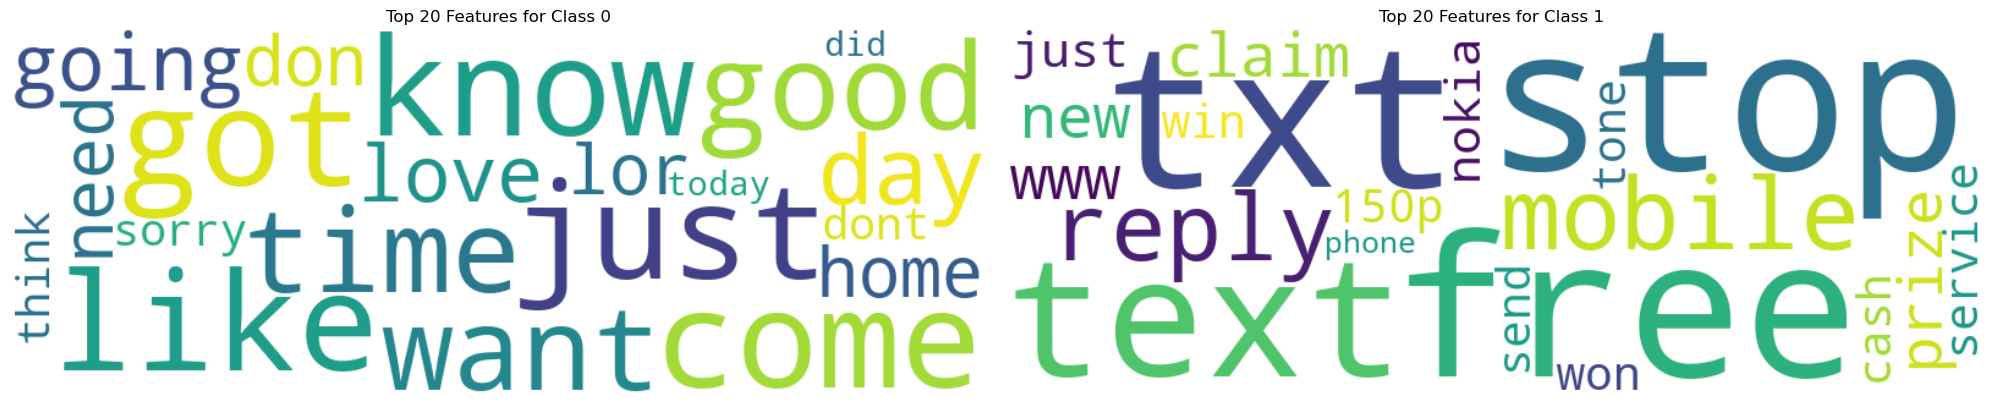

In [624]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

top_n = 20
plt.figure(figsize=(20, 10))

for i, class_prob in enumerate(feature_log_prob):
    sorted_indices = np.argsort(class_prob)[::-1][:top_n]
    top_features = {
        feature_names[index]: class_prob[index] for index in sorted_indices}

    # Generate a word cloud image
    wordcloud = WordCloud(
        width=800, height=300, background_color="white"
    ).generate_from_frequencies(top_features)

    # Add to subplot
    plt.subplot(1, len(feature_log_prob), i + 1)
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"Top {top_n} Features for Class {i}", fontsize=12)

plt.tight_layout()
plt.show()

display(
    HTML(
        """<center><i>Fig 8. Word Map of Top Predictors in Multinomial NB
    </i></center>"""
    )
)

Using a word map to visualize the top predictor, we can see the distinctive qualities of a regular SMS and a spam. The spam messages use enticing words such as free, new, cash, prize. It also uses words of urgency such as stop, reply, service. These words are indeed classic indicator of a phishing or spam messages. Meanwhile, words used in regular message convey conversational communication among individuals.

<a id='Header1'></a>
<h1 style="color:#ffffff; background-color:#845333; padding: 20px 0; text-align: left; font-weight: bold; padding-left: 20px;">DISCUSSION, CONCLUSION, AND RECOMMENDATION</h1><a id='ExecSum'></a><a id='Title'></a>

### On Naive-Bayes and Multinomial NB

From the results of our model, it is clear that **Multinomial NB** works best on highly sparse text data. Let us briefly discuss its superset: Naive-Bayes. 

**Naive-Bayes Classifier**

- This is a probability-based Machine Learning model based on Bayesian Statistics.
- The term "Naive" in Naive-Bayes comes from the assumption that the features used to predict the target variable are independent of each other.
- The types include: Categorical, Complement, Gaussian, and Multinomial. The focus of this project is on Multinomial NB. We will know more about the other types in Machine Learning 2. 

**Multinomial NB**
- It is suitable for classification with discrete features such as word counts for text classification.
- Hyperparameter: Alpha
- Effects of Alpha:
  - A higher alpha reduces the effect of the most frequent features and tends to make the classifier more conservative. (Simpler)
  - A lower alpha makes the classifier more sensitive to the most frequent features, which might improve performance on some datasets but increases the risk of overfitting.
- Advantages:
  - Effectiveness in Text Classification. MultinomialNB performs remarkably well in various text classification scenarios, especially with large datasets.
  - Handling of Imbalanced Data. It can work relatively well even with imbalanced datasets, which are common in real-world text classification problems.
  - Computational Efficiency. It requires a small amount of computational resources, allowing for quick training and prediction.
- Limitations:
  - Assumption of Feature Independence. Like other Naive Bayes models, it assumes that all features (words) are independent, which is rarely the case in real-world text data.
  - Vocabulary Limitation. The model's vocabulary is fixed to the words seen during training, which might limit its effectiveness on documents with new words.

### On CountVectorizer vs. TfidfVectorizer

Intuitively, we would expect that TfidfVectorizer will yield higher accuracy for our models. However, this is not the case for this scenario. It could be due to the following factors. 
- Data Characteristics. If the dataset is such that the raw frequency of words is a good predictor of the target variable, Count Vectorizer could naturally perform better.
- Model Sensitivity. Some models might be more sensitive to the features generated by Count Vectorizer. For example, Naive Bayes often works well with raw counts because of its assumptions about feature distribution.

In any case, it is a good practice to always compare the results when choosing the best technique in vectorizing our test data. 

### Conclusion

This project has covered a timely and critical examination of the pervasive issue of spam SMS within our country. Inspired by personal experience and enrich the learning from ML1 course, we have explored the capabilities of Machine Learning models, specifically the Multinomial Naive Bayes classifier, to identify and filter out spam messages, which is a text classification problem. 

Our findings reaffirm the efficacy of the Multinomial NB model on text classification, particularly in the context of large and sparse datasets such as those composed of SMS texts. Its performance is highlighted by its computational efficiency and its robustness in the face of imbalanced data, a common challenge in spam detection.

However, our exploration also uncovered the limitations inherent in the Naive Bayes approach, most notably the assumption of feature independence and the constraint of a fixed vocabulary learned during training. These limitations serve as a reminder that there is no one-size-fits-all solution in Machine Learning, and that careful consideration must be given to the nuances of each particular dataset and problem.

### Recommendation

Based on the insights gained from this project, the following recommendations are made for future efforts in spam detection:
- Continuous Model Evaluation and Update: Given the dynamic nature of spam tactics, it is a must for spam detection models to be continuously evaluated and updated with new data to maintain their effectiveness over time. Introduction of new data was not covered in this study. 
- Further Research on Vectorization Techniques: While CountVectorizer provided satisfactory results in this project, further research should be conducted on the impact of different text vectorization techniques, such as TfidfVectorizer, on various datasets and in conjunction with different models.
- Extension to Other Communication Platforms: As spam extends its reach beyond SMS to other digital platforms, future research should look to apply Machine Learning models to a broader range of communication media, including social media and email.

<a id='Header1'></a>
<h1 style="color:#ffffff; background-color:#845333; padding: 20px 0; text-align: left; font-weight: bold; padding-left: 20px;">REFERENCES</h1><a id='ExecSum'></a><a id='Title'></a>

1. Aggarwal, C. (2015). *Data Mining: The Textbook.*

2. Alis, C. (2023). Information Retrieval and Searching by Similarity. Unpublished Jupyter Notebook, Data Mining and Wrangling 1 (DMW1) Course, Master of Science in Data Science, Asian Institute of Management, Makati City,  Philippines.

3. Kharwal, A. (2020, June 12). SMS Spam Detection with Machine Learning. The Clever Programmer. Retrieved from https://thecleverprogrammer.com/2020/06/12/sms-spam-detection-with-machine-learning/

4. Monterola, C. (2023). Machine Learning 1. Unpublished Jupyter Notebooks, Machine Learning 1 (ML1) Course, Master of Science in Data Science, Asian Institute of Management, Makati City,  Philippines.

5. Müller, A. C., & Guido, S. (2017). *Introduction to Machine Learning with Python.* O'Reilly Media.

6. PhilStar. (2010, June 20). New Text Scam Victimizing OFWs? Retrieved from https://www.philstar.com/metro/2010/06/20/585578/new-text-scam-victimizing-ofws

7. scikit-learn developers. (n.d.). scikit-learn: Machine learning in Python. Retrieved from https://scikit-learn.org/stable/index.html

8. Stat Quest with Josh Starmer. (2020). Naive Bayes, Clearly Explained!!! [Video]. YouTube. Retrieved from https://www.youtube.com/watch?v=O2L2Uv9pdDA&t=85s

9. Statista. (2019). Number of SMS fraud or text scams incidents in the Philippines in 2019, by region. Retrieved from https://www.statista.com/statistics/1136130/philippines-number-of-sms-fraud-or-text-scams-incidents-by-region/

10. UCI Machine Learning. (2016). SMS Spam Collection Dataset. Kaggle. Retrieved from https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset/data